IMT 2200 - Introducción a Ciencia de Datos<br>
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2025-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>

---

## Proyecto de Investigación – Terremotos en Chile





## 1. Objetivos

**-Obtener información de terremotos en Chile**<br>
**-Calcular los mayores terremotos por región**<br> 
**-Calcular las zonas de mayores riesgos para terremotos comparando la escala de mercalli con la de richer**<br> 
**-Crear un modelo que pueda predecir en base a las estadísticas los posibles lugares de riegos**<br>
**-Crear un promedio de tiempo en el que pueda predecir cada cuanto puede acontecer un terremoto**<br>


## Datos

Los datos serán extraídos de https://www.usgs.gov/programs/earthquake-hazards/earthquakes. Principalmente del link, https://earthquake.usgs.gov/earthquakes/search/ . Donde se pueden filtrar los terremotos por zonas, año  y magnitud, generando un archivo .csv con la información.

In [21]:
import pandas as pd
from pathlib import Path
import geopandas as gpd
import matplotlib.pyplot as plt
import datetime

## Limpieza de datos

La apertura del documento descargado podemos observar que el Data Frame generado cuenta con más de 10.000 filas, y con 22 columnas, con información de tiempo, ubicación, magnitud, entre otros.

In [22]:
ruta = Path("query.csv")
df = pd.read_csv(ruta) 
df.columns


Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             10407 non-null  object 
 1   latitude         10407 non-null  float64
 2   longitude        10407 non-null  float64
 3   depth            10407 non-null  float64
 4   mag              10407 non-null  float64
 5   magType          10407 non-null  object 
 6   nst              4033 non-null   float64
 7   gap              5882 non-null   float64
 8   dmin             2799 non-null   float64
 9   rms              8082 non-null   float64
 10  net              10407 non-null  object 
 11  id               10407 non-null  object 
 12  updated          10407 non-null  object 
 13  place            10407 non-null  object 
 14  type             10407 non-null  object 
 15  horizontalError  2563 non-null   float64
 16  depthError       5446 non-null   float64
 17  magError    

In [159]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-09-01T13:48:01.759Z,-30.6105,-71.2446,61.209,4.6,mb,50.0,71.0,0.342,0.81,...,2025-09-01T17:26:31.440Z,"4 km WSW of Ovalle, Chile",earthquake,5.13,5.452,0.109,25.0,reviewed,us,us
1,2025-08-29T21:48:43.387Z,-18.9492,-69.4232,114.517,4.6,mb,53.0,103.0,0.616,0.98,...,2025-08-30T03:24:45.040Z,"40 km N of Camiña, Chile",earthquake,5.16,5.411,0.079,49.0,reviewed,us,us
2,2025-08-25T18:01:03.119Z,-21.7142,-68.4897,118.465,4.7,mb,44.0,63.0,0.704,1.19,...,2025-08-25T18:16:37.040Z,"59 km SSW of Ollagüe, Chile",earthquake,4.54,5.964,0.060,85.0,reviewed,us,us
3,2025-08-24T03:44:08.460Z,-19.3888,-69.2674,100.534,5.0,mb,59.0,104.0,0.287,1.04,...,2025-08-24T15:32:52.214Z,"18 km ESE of Camiña, Chile",earthquake,6.76,5.716,0.029,391.0,reviewed,us,us
4,2025-08-23T09:07:59.103Z,-32.5045,-71.5221,53.111,4.7,mb,49.0,133.0,0.527,0.84,...,2025-08-24T15:09:12.040Z,"27 km WSW of La Ligua, Chile",earthquake,2.93,5.576,0.097,32.0,reviewed,us,us


Observando los datos vamos a partir editando la columnas de time para crear 2 columnas nuevas, una con el nombre "date" con la fecha del terremoto y la otra como "hour" con la hora, ambas columnas las transformaremos al formato de fecha.

In [160]:
df_copy = df.copy()
df_copy["dates"] = df_copy["time"].apply(lambda x: x.split("T"))
df_copy["date"] = df_copy["dates"].apply(lambda x:  pd.to_datetime(x[0]).strftime("%Y-%m-%d"))
df_copy["hour"] = df_copy["dates"].apply(lambda x: pd.to_datetime(x[1][:-1]).strftime("%H:%M:%S"))
df_copy

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,horizontalError,depthError,magError,magNst,status,locationSource,magSource,dates,date,hour
0,2025-09-01T13:48:01.759Z,-30.6105,-71.2446,61.209,4.60,mb,50.0,71.0,0.342,0.81,...,5.13,5.452,0.109,25.0,reviewed,us,us,"[2025-09-01, 13:48:01.759Z]",2025-09-01,13:48:01
1,2025-08-29T21:48:43.387Z,-18.9492,-69.4232,114.517,4.60,mb,53.0,103.0,0.616,0.98,...,5.16,5.411,0.079,49.0,reviewed,us,us,"[2025-08-29, 21:48:43.387Z]",2025-08-29,21:48:43
2,2025-08-25T18:01:03.119Z,-21.7142,-68.4897,118.465,4.70,mb,44.0,63.0,0.704,1.19,...,4.54,5.964,0.060,85.0,reviewed,us,us,"[2025-08-25, 18:01:03.119Z]",2025-08-25,18:01:03
3,2025-08-24T03:44:08.460Z,-19.3888,-69.2674,100.534,5.00,mb,59.0,104.0,0.287,1.04,...,6.76,5.716,0.029,391.0,reviewed,us,us,"[2025-08-24, 03:44:08.460Z]",2025-08-24,03:44:08
4,2025-08-23T09:07:59.103Z,-32.5045,-71.5221,53.111,4.70,mb,49.0,133.0,0.527,0.84,...,2.93,5.576,0.097,32.0,reviewed,us,us,"[2025-08-23, 09:07:59.103Z]",2025-08-23,09:07:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10402,1906-10-02T14:33:45.430Z,-32.1750,-71.7630,15.000,6.35,mw,NaN,NaN,NaN,NaN,...,NaN,13.100,0.200,NaN,reviewed,iscgem,iscgem,"[1906-10-02, 14:33:45.430Z]",1906-10-02,14:33:45
10403,1906-08-19T09:34:08.360Z,-39.2280,-72.7210,15.000,6.74,mw,NaN,NaN,NaN,NaN,...,NaN,25.000,0.200,NaN,reviewed,iscgemsup,iscgemsup,"[1906-08-19, 09:34:08.360Z]",1906-08-19,09:34:08
10404,1906-08-17T00:40:04.250Z,-32.4000,-71.4000,35.000,8.20,mw,NaN,NaN,NaN,NaN,...,NaN,11.100,0.200,NaN,reviewed,iscgemsup,iscgemsup,"[1906-08-17, 00:40:04.250Z]",1906-08-17,00:40:04
10405,1904-12-11T17:05:42.720Z,-32.3120,-73.7060,10.000,6.72,mw,NaN,NaN,NaN,NaN,...,NaN,25.000,0.230,NaN,reviewed,iscgemsup,iscgemsup,"[1904-12-11, 17:05:42.720Z]",1904-12-11,17:05:42


In [161]:
df_copy["status"].astype("category")
df_copy["status"].unique()

array(['reviewed', 'automatic'], dtype=object)

In [162]:
df_copy["locationSource"].astype("category")
df_copy["locationSource"].unique()

array(['us', 'guc', 'sja', 'us_guc', 'us_sja', 'iscgem', 'iscgemsup'],
      dtype=object)

In [163]:
df_copy["net"].astype("category")
df_copy["net"].unique()

array(['us', 'iscgem', 'official', 'iscgemsup'], dtype=object)

In [164]:
df_copy["magSource"].astype("category")
df_copy["magSource"].unique()

array(['us', 'guc', 'gcmt', 'us_guc', 'sja', 'iscgem', 'official', 'hrv',
       'san', 'nc', 'iscgemsup'], dtype=object)

In [165]:
df_copy["type"].astype("category")
df_copy["type"].unique()

array(['earthquake'], dtype=object)

In [166]:
df_copy[["time", "updated"]]

,time,updated
0,2025-09-01T13:48:01.759Z,2025-09-01T17:26:31.440Z
1,2025-08-29T21:48:43.387Z,2025-08-30T03:24:45.040Z
2,2025-08-25T18:01:03.119Z,2025-08-25T18:16:37.040Z
3,2025-08-24T03:44:08.460Z,2025-08-24T15:32:52.214Z
4,2025-08-23T09:07:59.103Z,2025-08-24T15:09:12.040Z
...,...,...
10402,1906-10-02T14:33:45.430Z,2022-04-25T20:40:47.117Z
10403,1906-08-19T09:34:08.360Z,2022-05-09T15:12:00.619Z
10404,1906-08-17T00:40:04.250Z,2024-12-13T06:53:22.309Z
10405,1904-12-11T17:05:42.720Z,2022-05-09T15:22:32.530Z


Observando los datos podemos ver 5 columnas que no aportan información para nuestra investigación, tenemos "locationSource", "iscgem" y "magSource", que son solo información sobre las fuentes de la información, por otro lado, la columna "type" solo existe una categoría que es earthqueake. Por otro lado, tenemos la columna "updated" que es solo la fecha en la que fue actualizada la información. Como consideramos que no es útil para nuestra investigación vamos a descartar estas columnas.

In [167]:
df_copy = df_copy.drop(columns= ["time", "dates", "status", "locationSource", "net", "updated", "magSource", "type"])

In [168]:
df_copy

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,id,place,horizontalError,depthError,magError,magNst,date,hour
0,-30.6105,-71.2446,61.209,4.60,mb,50.0,71.0,0.342,0.81,us7000qt0p,"4 km WSW of Ovalle, Chile",5.13,5.452,0.109,25.0,2025-09-01,13:48:01
1,-18.9492,-69.4232,114.517,4.60,mb,53.0,103.0,0.616,0.98,us7000qs9z,"40 km N of Camiña, Chile",5.16,5.411,0.079,49.0,2025-08-29,21:48:43
2,-21.7142,-68.4897,118.465,4.70,mb,44.0,63.0,0.704,1.19,us7000qqvr,"59 km SSW of Ollagüe, Chile",4.54,5.964,0.060,85.0,2025-08-25,18:01:03
3,-19.3888,-69.2674,100.534,5.00,mb,59.0,104.0,0.287,1.04,us6000r3fa,"18 km ESE of Camiña, Chile",6.76,5.716,0.029,391.0,2025-08-24,03:44:08
4,-32.5045,-71.5221,53.111,4.70,mb,49.0,133.0,0.527,0.84,us6000r3as,"27 km WSW of La Ligua, Chile",2.93,5.576,0.097,32.0,2025-08-23,09:07:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10402,-32.1750,-71.7630,15.000,6.35,mw,NaN,NaN,NaN,NaN,iscgem610548661,"58 km WNW of La Ligua, Chile",NaN,13.100,0.200,NaN,1906-10-02,14:33:45
10403,-39.2280,-72.7210,15.000,6.74,mw,NaN,NaN,NaN,NaN,iscgemsup16957914,"17 km NNW of Loncoche, Chile",NaN,25.000,0.200,NaN,1906-08-19,09:34:08
10404,-32.4000,-71.4000,35.000,8.20,mw,NaN,NaN,NaN,NaN,iscgemsup16957911,"The 1906 Valparaiso, Chile Earthquake",NaN,11.100,0.200,NaN,1906-08-17,00:40:04
10405,-32.3120,-73.7060,10.000,6.72,mw,NaN,NaN,NaN,NaN,iscgemsup610548593,"210 km WNW of Valparaíso, Chile",NaN,25.000,0.230,NaN,1904-12-11,17:05:42


Ahora como nuestra investigación se da solo en Chile filtraremos por la columna de "place" dejando solo aquellas con el nombre de Chile en ellas.

In [169]:
df_copy = df_copy[df_copy["place"].str.contains("Chile", na=False)].reset_index()
df_copy

,index,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,id,place,horizontalError,depthError,magError,magNst,date,hour
0,0,-30.6105,-71.2446,61.209,4.60,mb,50.0,71.0,0.342,0.81,us7000qt0p,"4 km WSW of Ovalle, Chile",5.13,5.452,0.109,25.0,2025-09-01,13:48:01
1,1,-18.9492,-69.4232,114.517,4.60,mb,53.0,103.0,0.616,0.98,us7000qs9z,"40 km N of Camiña, Chile",5.16,5.411,0.079,49.0,2025-08-29,21:48:43
2,2,-21.7142,-68.4897,118.465,4.70,mb,44.0,63.0,0.704,1.19,us7000qqvr,"59 km SSW of Ollagüe, Chile",4.54,5.964,0.060,85.0,2025-08-25,18:01:03
3,3,-19.3888,-69.2674,100.534,5.00,mb,59.0,104.0,0.287,1.04,us6000r3fa,"18 km ESE of Camiña, Chile",6.76,5.716,0.029,391.0,2025-08-24,03:44:08
4,4,-32.5045,-71.5221,53.111,4.70,mb,49.0,133.0,0.527,0.84,us6000r3as,"27 km WSW of La Ligua, Chile",2.93,5.576,0.097,32.0,2025-08-23,09:07:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9479,10402,-32.1750,-71.7630,15.000,6.35,mw,NaN,NaN,NaN,NaN,iscgem610548661,"58 km WNW of La Ligua, Chile",NaN,13.100,0.200,NaN,1906-10-02,14:33:45
9480,10403,-39.2280,-72.7210,15.000,6.74,mw,NaN,NaN,NaN,NaN,iscgemsup16957914,"17 km NNW of Loncoche, Chile",NaN,25.000,0.200,NaN,1906-08-19,09:34:08
9481,10404,-32.4000,-71.4000,35.000,8.20,mw,NaN,NaN,NaN,NaN,iscgemsup16957911,"The 1906 Valparaiso, Chile Earthquake",NaN,11.100,0.200,NaN,1906-08-17,00:40:04
9482,10405,-32.3120,-73.7060,10.000,6.72,mw,NaN,NaN,NaN,NaN,iscgemsup610548593,"210 km WNW of Valparaíso, Chile",NaN,25.000,0.230,NaN,1904-12-11,17:05:42


In [170]:
df_copy["place"] = df_copy["place"].apply(lambda x: x.split(",")[0])

In [171]:
df_copy

,index,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,id,place,horizontalError,depthError,magError,magNst,date,hour
0,0,-30.6105,-71.2446,61.209,4.60,mb,50.0,71.0,0.342,0.81,us7000qt0p,4 km WSW of Ovalle,5.13,5.452,0.109,25.0,2025-09-01,13:48:01
1,1,-18.9492,-69.4232,114.517,4.60,mb,53.0,103.0,0.616,0.98,us7000qs9z,40 km N of Camiña,5.16,5.411,0.079,49.0,2025-08-29,21:48:43
2,2,-21.7142,-68.4897,118.465,4.70,mb,44.0,63.0,0.704,1.19,us7000qqvr,59 km SSW of Ollagüe,4.54,5.964,0.060,85.0,2025-08-25,18:01:03
3,3,-19.3888,-69.2674,100.534,5.00,mb,59.0,104.0,0.287,1.04,us6000r3fa,18 km ESE of Camiña,6.76,5.716,0.029,391.0,2025-08-24,03:44:08
4,4,-32.5045,-71.5221,53.111,4.70,mb,49.0,133.0,0.527,0.84,us6000r3as,27 km WSW of La Ligua,2.93,5.576,0.097,32.0,2025-08-23,09:07:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9479,10402,-32.1750,-71.7630,15.000,6.35,mw,NaN,NaN,NaN,NaN,iscgem610548661,58 km WNW of La Ligua,NaN,13.100,0.200,NaN,1906-10-02,14:33:45
9480,10403,-39.2280,-72.7210,15.000,6.74,mw,NaN,NaN,NaN,NaN,iscgemsup16957914,17 km NNW of Loncoche,NaN,25.000,0.200,NaN,1906-08-19,09:34:08
9481,10404,-32.4000,-71.4000,35.000,8.20,mw,NaN,NaN,NaN,NaN,iscgemsup16957911,The 1906 Valparaiso,NaN,11.100,0.200,NaN,1906-08-17,00:40:04
9482,10405,-32.3120,-73.7060,10.000,6.72,mw,NaN,NaN,NaN,NaN,iscgemsup610548593,210 km WNW of Valparaíso,NaN,25.000,0.230,NaN,1904-12-11,17:05:42


In [172]:
df_copy.sample(5)

,index,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,id,place,horizontalError,depthError,magError,magNst,date,hour
731,847,-21.1386,-68.8913,118.72,4.6,mwr,NaN,44.0,0.564,0.93,us7000cpez,145 km N of Calama,6.2,5.3,NaN,NaN,2020-12-09,10:20:52
7157,7804,-27.5100,-71.1590,33.00,4.7,mb,NaN,NaN,NaN,1.30,usp0004k4n,83 km W of Copiapó,NaN,NaN,NaN,2.0,1991-01-03,01:11:57
2481,2740,-20.5508,-70.9127,6.90,4.9,mwr,NaN,80.0,1.204,0.88,usc000p310,87 km WSW of Iquique,NaN,2.4,0.049,40.0,2014-04-03,15:08:07
5730,6224,-33.6320,-72.0780,28.30,4.6,ml,27.0,NaN,NaN,NaN,usp000bbzr,43 km W of San Antonio,NaN,NaN,NaN,NaN,2002-09-11,13:34:49
8469,9251,-20.5430,-68.6370,126.00,4.8,mb,NaN,NaN,NaN,NaN,usp00012s8,162 km ESE of Iquique,NaN,NaN,NaN,NaN,1979-09-02,14:29:40


In [173]:
df_copy["zone"] = df_copy["place"].str.split("of")
df_copy["zone"] = df_copy["zone"].apply(lambda x: x[-1])
df_copy

,index,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,id,place,horizontalError,depthError,magError,magNst,date,hour,zone
0,0,-30.6105,-71.2446,61.209,4.60,mb,50.0,71.0,0.342,0.81,us7000qt0p,4 km WSW of Ovalle,5.13,5.452,0.109,25.0,2025-09-01,13:48:01,Ovalle
1,1,-18.9492,-69.4232,114.517,4.60,mb,53.0,103.0,0.616,0.98,us7000qs9z,40 km N of Camiña,5.16,5.411,0.079,49.0,2025-08-29,21:48:43,Camiña
2,2,-21.7142,-68.4897,118.465,4.70,mb,44.0,63.0,0.704,1.19,us7000qqvr,59 km SSW of Ollagüe,4.54,5.964,0.060,85.0,2025-08-25,18:01:03,Ollagüe
3,3,-19.3888,-69.2674,100.534,5.00,mb,59.0,104.0,0.287,1.04,us6000r3fa,18 km ESE of Camiña,6.76,5.716,0.029,391.0,2025-08-24,03:44:08,Camiña
4,4,-32.5045,-71.5221,53.111,4.70,mb,49.0,133.0,0.527,0.84,us6000r3as,27 km WSW of La Ligua,2.93,5.576,0.097,32.0,2025-08-23,09:07:59,La Ligua
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9479,10402,-32.1750,-71.7630,15.000,6.35,mw,NaN,NaN,NaN,NaN,iscgem610548661,58 km WNW of La Ligua,NaN,13.100,0.200,NaN,1906-10-02,14:33:45,La Ligua
9480,10403,-39.2280,-72.7210,15.000,6.74,mw,NaN,NaN,NaN,NaN,iscgemsup16957914,17 km NNW of Loncoche,NaN,25.000,0.200,NaN,1906-08-19,09:34:08,Loncoche
9481,10404,-32.4000,-71.4000,35.000,8.20,mw,NaN,NaN,NaN,NaN,iscgemsup16957911,The 1906 Valparaiso,NaN,11.100,0.200,NaN,1906-08-17,00:40:04,The 1906 Valparaiso
9482,10405,-32.3120,-73.7060,10.000,6.72,mw,NaN,NaN,NaN,NaN,iscgemsup610548593,210 km WNW of Valparaíso,NaN,25.000,0.230,NaN,1904-12-11,17:05:42,Valparaíso


In [174]:
df_copy["zone"].astype("category")
df_copy["zone"].unique()

array([' Ovalle', ' Camiña', ' Ollagüe', ' La Ligua', ' La Serena',
       ' Aisen', ' Copiapó', ' Carahue', ' Calama', ' Machalí',
       ' Coquimbo', ' Colchane', ' Puerto Chacabuco', 'agasta',
       ' Vallenar', ' Taltal', ' San Antonio', ' Illapel', ' Chonchi',
       ' Diego de Almagro', ' Salamanca', ' Cartagena', ' Castro',
       ' Tocopilla', ' Constitución', ' Puerto Natales', ' La Tirana',
       ' Corral', ' Valparaíso', ' Lebu', ' Monte Patria', ' Mejillones',
       ' Los Andes', ' Puerto', ' Villarrica', ' Pozo Almonte', ' Molina',
       ' Cochrane', ' Huara', ' Talcahuano', ' Puerto Cisnes', ' Arauco',
       ' San Pedro de Atacama', ' Chicureo Abajo', ' Pucón',
       ' Puente Alto', ' Chiguayante', ' Tomé', ' Cuya', ' Viña del Mar',
       ' Rengo', ' Coronel', ' Cañete', ' San Felipe', ' Ollag?e',
       ' Panguipulli', ' Quirihue', ' Bio-Bio', 'Tarapaca',
       'Chile-Argentina border region', ' La Junta', ' Ancud',
       ' Curanilahue', ' Colbún', ' Araucania',

In [175]:
correcciones = {"Ollag?e": "Ollagüe", 
 ' Cami?a': "Camiña", 
 "agasta": "Antofagasta",
 "Maule - Bio-Bio border region": "Maule", 
 '2010 Maule': "Maule",' Copiap?': "Copiapó", 
 ' Quell?n': 'Quellón', 
 '1960 Great Chilean Earthquake (Valdivia Earthquake)': "Valdivia", 
 'The 1906 Valparaiso': "Valparaíso", 
 'Offshore Valparaiso': ' Valparaíso', 
 ' Valparaiso': 'Valparaíso',
 "Libertador General Bernardo O'Higgins": "Libertador O'Higgins"
}
limiters = ('Chile-Argentina border region', "'Bio-Bio - Araucania border region'", 'Chile-Bolivia border region' , 'agasta-Atacama border region')
df_copy = df_copy[~df_copy["zone"].isin(limiters)]
df_copy['zone'] = df_copy['zone'].map(lambda nombre: correcciones.get(nombre, nombre))
df_copy["zone"] = df_copy["zone"].str.strip()

C:\Users\de_za\AppData\Local\Temp\ipykernel_21952\731259146.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['zone'] = df_copy['zone'].map(lambda nombre: correcciones.get(nombre, nombre))
C:\Users\de_za\AppData\Local\Temp\ipykernel_21952\731259146.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy["zone"] = df_copy["zone"].str.strip()


In [176]:
df_copy["zone"].unique()

array(['Ovalle', 'Camiña', 'Ollagüe', 'La Ligua', 'La Serena', 'Aisen',
       'Copiapó', 'Carahue', 'Calama', 'Machalí', 'Coquimbo', 'Colchane',
       'Puerto Chacabuco', 'Antofagasta', 'Vallenar', 'Taltal',
       'San Antonio', 'Illapel', 'Chonchi', 'Diego de Almagro',
       'Salamanca', 'Cartagena', 'Castro', 'Tocopilla', 'Constitución',
       'Puerto Natales', 'La Tirana', 'Corral', 'Valparaíso', 'Lebu',
       'Monte Patria', 'Mejillones', 'Los Andes', 'Puerto', 'Villarrica',
       'Pozo Almonte', 'Molina', 'Cochrane', 'Huara', 'Talcahuano',
       'Puerto Cisnes', 'Arauco', 'San Pedro de Atacama',
       'Chicureo Abajo', 'Pucón', 'Puente Alto', 'Chiguayante', 'Tomé',
       'Cuya', 'Viña del Mar', 'Rengo', 'Coronel', 'Cañete', 'San Felipe',
       'Ollag?e', 'Panguipulli', 'Quirihue', 'Bio-Bio', 'Tarapaca',
       'La Junta', 'Ancud', 'Curanilahue', 'Colbún', 'Araucania', 'Teno',
       'Santa Cruz', 'Maule', 'Atacama', 'Melipilla', 'María Elena',
       'Arica', 'San Cleme

In [177]:
comunas_por_region = {
    "Arica y Parinacota": {
        "comunas": [
            "Arica", "Camarones", "Putre", "General Lagos"
        ],
        "numero_region": "XV"
    },
    "Tarapacá": {
        "comunas": [
            "Iquique", "Alto Hospicio", "Pozo Almonte", "Camiña", "Colchane", "Huara", "Pica"
        ],
        "numero_region": "I"
    },
    "Antofagasta": {
        "comunas": [
            "Antofagasta", "Mejillones", "Sierra Gorda", "Taltal", "Calama", "Ollagüe", 
            "San Pedro de Atacama", "Tocopilla", "María Elena"
        ],
        "numero_region": "II"
    },
    "Atacama": {
        "comunas": [
            "Copiapó", "Caldera", "Tierra Amarilla", "Chañaral", "Diego de Almagro", 
            "Vallenar", "Alto del Carmen", "Freirina", "Huasco"
        ],
        "numero_region": "III"
    },
    "Coquimbo": {
        "comunas": [
            "La Serena", "Coquimbo", "Andacollo", "La Higuera", "Paiguano", "Vicuña", 
            "Illapel", "Canela", "Los Vilos", "Salamanca", "Ovalle", "Combarbalá", 
            "Monte Patria", "Punitaqui", "Río Hurtado"
        ],
        "numero_region": "IV"
    },
    "Valparaíso": {
        "comunas": [
            "Valparaíso", "Casablanca", "Concón", "Juan Fernández", "Puchuncaví", 
            "Quintero", "Viña del Mar", "Isla de Pascua", "Los Andes", "Calle Larga", 
            "Rinconada", "San Esteban", "La Ligua", "Cabildo", "Papudo", "Petorca", 
            "Zapallar", "Quillota", "Calera", "Hijuelas", "La Cruz", "Nogales", 
            "San Antonio", "Algarrobo", "Cartagena", "El Quisco", "El Tabo", 
            "Santo Domingo", "San Felipe", "Catemu", "Llaillay", "Panquehue", 
            "Putaendo", "Santa María", "Quilpué", "Limache", "Olmué", "Villa Alemana"
        ],
        "numero_region": "V"
    },
    "Región Metropolitana": {
        "comunas": [
            "Santiago", "Cerrillos", "Cerro Navia", "Conchalí", "El Bosque", "Estación Central",
            "Huechuraba", "Independencia", "La Cisterna", "La Florida", "La Granja", "La Pintana",
            "La Reina", "Las Condes", "Lo Barnechea", "Lo Espejo", "Lo Prado", "Macul", "Maipú",
            "Ñuñoa", "Pedro Aguirre Cerda", "Peñalolén", "Providencia", "Pudahuel", "Quilicura",
            "Quinta Normal", "Recoleta", "Renca", "San Joaquín", "San Miguel", "San Ramón",
            "Vitacura", "Puente Alto", "Pirque", "San José de Maipo", "Colina", "Lampa",
            "Tiltil", "San Bernardo", "Buin", "Calera de Tango", "Paine", "Melipilla",
            "Alhué", "Curacaví", "María Pinto", "San Pedro", "Talagante", "El Monte",
            "Isla de Maipo", "Padre Hurtado", "Peñaflor"
        ],
        "numero_region": "RM"
    },
    "Libertador General Bernardo O'Higgins": {
        "comunas": [
            "Rancagua", "Codegua", "Coinco", "Coltauco", "Doñihue", "Graneros", "Las Cabras",
            "Machalí", "Malloa", "Mostazal", "Olivar", "Peumo", "Pichidegua", "Quinta de Tilcoco",
            "Rengo", "Requínoa", "San Vicente", "Pichilemu", "La Estrella", "Litueche", "Marchihue",
            "Navidad", "Paredones", "San Fernando", "Chépica", "Chimbarongo", "Lolol", "Nancagua",
            "Palmilla", "Peralillo", "Placilla", "Pumanque", "Santa Cruz"
        ],
        "numero_region": "VI"
    },
    "Maule": {
        "comunas": [
            "Talca", "Constitución", "Curepto", "Empedrado", "Maule", "Pelarco", "Pencahue",
            "Río Claro", "San Clemente", "San Rafael", "Cauquenes", "Chanco", "Pelluhue",
            "Curicó", "Hualañé", "Licantén", "Molina", "Rauco", "Romeral", "Sagrada Familia",
            "Teno", "Vichuquén", "Linares", "Colbún", "Longaví", "Parral", "Retiro", "San Javier",
            "Villa Alegre", "Yerbas Buenas"
        ],
        "numero_region": "VII"
    },
    "Ñuble": {
        "comunas": [
            "Chillán", "Bulnes", "Chillán Viejo", "El Carmen", "Pemuco", "Pinto", "Quillón",
            "San Ignacio", "Yungay", "Cobquecura", "Coelemu", "Ninhue", "Portezuelo", "Quirihue",
            "Ránquil", "Treguaco", "San Carlos", "Coihueco", "Ñiquén", "San Fabián", "San Nicolás"
        ],
        "numero_region": "XVI"
    },
    "Biobío": {
        "comunas": [
            "Concepción", "Coronel", "Chiguayante", "Florida", "Hualpén", "Hualqui", "Lota",
            "Penco", "San Pedro de la Paz", "Santa Juana", "Talcahuano", "Tomé", "Arauco",
            "Cañete", "Contulmo", "Curanilahue", "Lebu", "Los Álamos", "Tirúa", "Los Ángeles",
            "Antuco", "Cabrero", "Laja", "Mulchén", "Nacimiento", "Negrete", "Quilaco", "Quilleco",
            "San Rosendo", "Santa Bárbara", "Tucapel", "Yumbel", "Alto Biobío"
        ],
        "numero_region": "VIII"
    },
    "Araucanía": {
        "comunas": [
            "Temuco", "Carahue", "Cunco", "Curarrehue", "Freire", "Galvarino", "Gorbea",
            "Lautaro", "Loncoche", "Melipeuco", "Nueva Imperial", "Padre las Casas", "Perquenco",
            "Pitrufquén", "Pucón", "Saavedra", "Teodoro Schmidt", "Toltén", "Vilcún", "Villarrica",
            "Cholchol", "Angol", "Collipulli", "Curacautín", "Ercilla", "Lonquimay", "Los Sauces",
            "Lumaco", "Purén", "Renaico", "Traiguén", "Victoria"
        ],
        "numero_region": "IX"
    },
    "Los Ríos": {
        "comunas": [
            "Valdivia", "Corral", "Lanco", "Los Lagos", "Máfil", "Mariquina", "Paillaco",
            "Panguipulli", "La Unión", "Futrono", "Lago Ranco", "Río Bueno"
        ],
        "numero_region": "XIV"
    },
    "Los Lagos": {
        "comunas": [
            "Puerto Montt", "Calbuco", "Cochamó", "Fresia", "Frutillar", "Los Muermos",
            "Llanquihue", "Maullín", "Puerto Varas", "Castro", "Ancud", "Chonchi", "Curaco de Vélez",
            "Dalcahue", "Puqueldón", "Queilén", "Quellón", "Quemchi", "Quinchao", "Osorno",
            "Puerto Octay", "Purranque", "Puyehue", "Río Negro", "San Juan de la Costa", "San Pablo",
            "Chaitén", "Futaleufú", "Hualaihué", "Palena"
        ],
        "numero_region": "X"
    },
    "Aysén": {
        "comunas": [
            "Coyhaique", "Lago Verde", "Aysén", "Cisnes", "Guaitecas", "Cochrane", "O'Higgins",
            "Tortel", "Chile Chico", "Río Ibáñez"
        ],
        "numero_region": "XI"
    },
    "Magallanes": {
        "comunas": [
            "Punta Arenas", "Laguna Blanca", "Río Verde", "San Gregorio", "Cabo de Hornos",
            "Antártica", "Porvenir", "Primavera", "Timaukel", "Natales", "Torres del Paine"
        ],
        "numero_region": "XII"
    }
}

def encontrar_region(comuna):
    for region, datos in comunas_por_region.items():
        if comuna in datos["comunas"]:
            return region
    return None  # O "Desconocido" si prefieres

df_copy['region'] = df_copy['zone'].apply(encontrar_region)

C:\Users\de_za\AppData\Local\Temp\ipykernel_21952\4390329.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['region'] = df_copy['zone'].apply(encontrar_region)


In [178]:
df_copy["region"].astype("category")
df_copy["region"].unique()

array(['Coquimbo', 'Tarapacá', 'Antofagasta', 'Valparaíso', None,
       'Atacama', 'Araucanía', "Libertador General Bernardo O'Higgins",
       'Los Lagos', 'Maule', 'Los Ríos', 'Biobío', 'Aysén',
       'Región Metropolitana', 'Ñuble', 'Arica y Parinacota',
       'Magallanes'], dtype=object)

In [179]:
df_copy = df_copy[df_copy["region"].notna()]
df_copy["region"].unique()

array(['Coquimbo', 'Tarapacá', 'Antofagasta', 'Valparaíso', 'Atacama',
       'Araucanía', "Libertador General Bernardo O'Higgins", 'Los Lagos',
       'Maule', 'Los Ríos', 'Biobío', 'Aysén', 'Región Metropolitana',
       'Ñuble', 'Arica y Parinacota', 'Magallanes'], dtype=object)

In [180]:
df_copy = df_copy.drop(columns= "place").reset_index()
df_copy

,level_0,index,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,id,horizontalError,depthError,magError,magNst,date,hour,zone,region
0,0,0,-30.6105,-71.2446,61.209,4.60,mb,50.0,71.0,0.342,0.81,us7000qt0p,5.13,5.452,0.109,25.0,2025-09-01,13:48:01,Ovalle,Coquimbo
1,1,1,-18.9492,-69.4232,114.517,4.60,mb,53.0,103.0,0.616,0.98,us7000qs9z,5.16,5.411,0.079,49.0,2025-08-29,21:48:43,Camiña,Tarapacá
2,2,2,-21.7142,-68.4897,118.465,4.70,mb,44.0,63.0,0.704,1.19,us7000qqvr,4.54,5.964,0.060,85.0,2025-08-25,18:01:03,Ollagüe,Antofagasta
3,3,3,-19.3888,-69.2674,100.534,5.00,mb,59.0,104.0,0.287,1.04,us6000r3fa,6.76,5.716,0.029,391.0,2025-08-24,03:44:08,Camiña,Tarapacá
4,4,4,-32.5045,-71.5221,53.111,4.70,mb,49.0,133.0,0.527,0.84,us6000r3as,2.93,5.576,0.097,32.0,2025-08-23,09:07:59,La Ligua,Valparaíso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8972,9479,10402,-32.1750,-71.7630,15.000,6.35,mw,NaN,NaN,NaN,NaN,iscgem610548661,NaN,13.100,0.200,NaN,1906-10-02,14:33:45,La Ligua,Valparaíso
8973,9480,10403,-39.2280,-72.7210,15.000,6.74,mw,NaN,NaN,NaN,NaN,iscgemsup16957914,NaN,25.000,0.200,NaN,1906-08-19,09:34:08,Loncoche,Araucanía
8974,9481,10404,-32.4000,-71.4000,35.000,8.20,mw,NaN,NaN,NaN,NaN,iscgemsup16957911,NaN,11.100,0.200,NaN,1906-08-17,00:40:04,Valparaíso,Valparaíso
8975,9482,10405,-32.3120,-73.7060,10.000,6.72,mw,NaN,NaN,NaN,NaN,iscgemsup610548593,NaN,25.000,0.230,NaN,1904-12-11,17:05:42,Valparaíso,Valparaíso


Observamos que hay varias columnas con datos nulos, pero no la descartaremos aun ya que no queremos perder información. Por ello dependiendo de la pregunta descartaremos algunas columnas con datos nulos.

## Pregunta 3:
**-Calcular las zonas de mayores riesgos para terremotos comparando la escala de mercalli con la de richer**<br> 



In [52]:
gdf = gpd.GeoDataFrame(
    df_copy, geometry=gpd.points_from_xy(df_copy["longitude"], df_copy["latitude"]), crs="EPSG:4326")

direccion = Path("Regiones") / "Regional.shp"
regional = gpd.read_file(direccion) #abrimos el documento regional.shp

regional_corrected = regional.set_crs("EPSG:3857", allow_override=True)
# convertimos el crs a epsg:4326
regional_wgs84 = regional_corrected.to_crs("EPSG:4326")

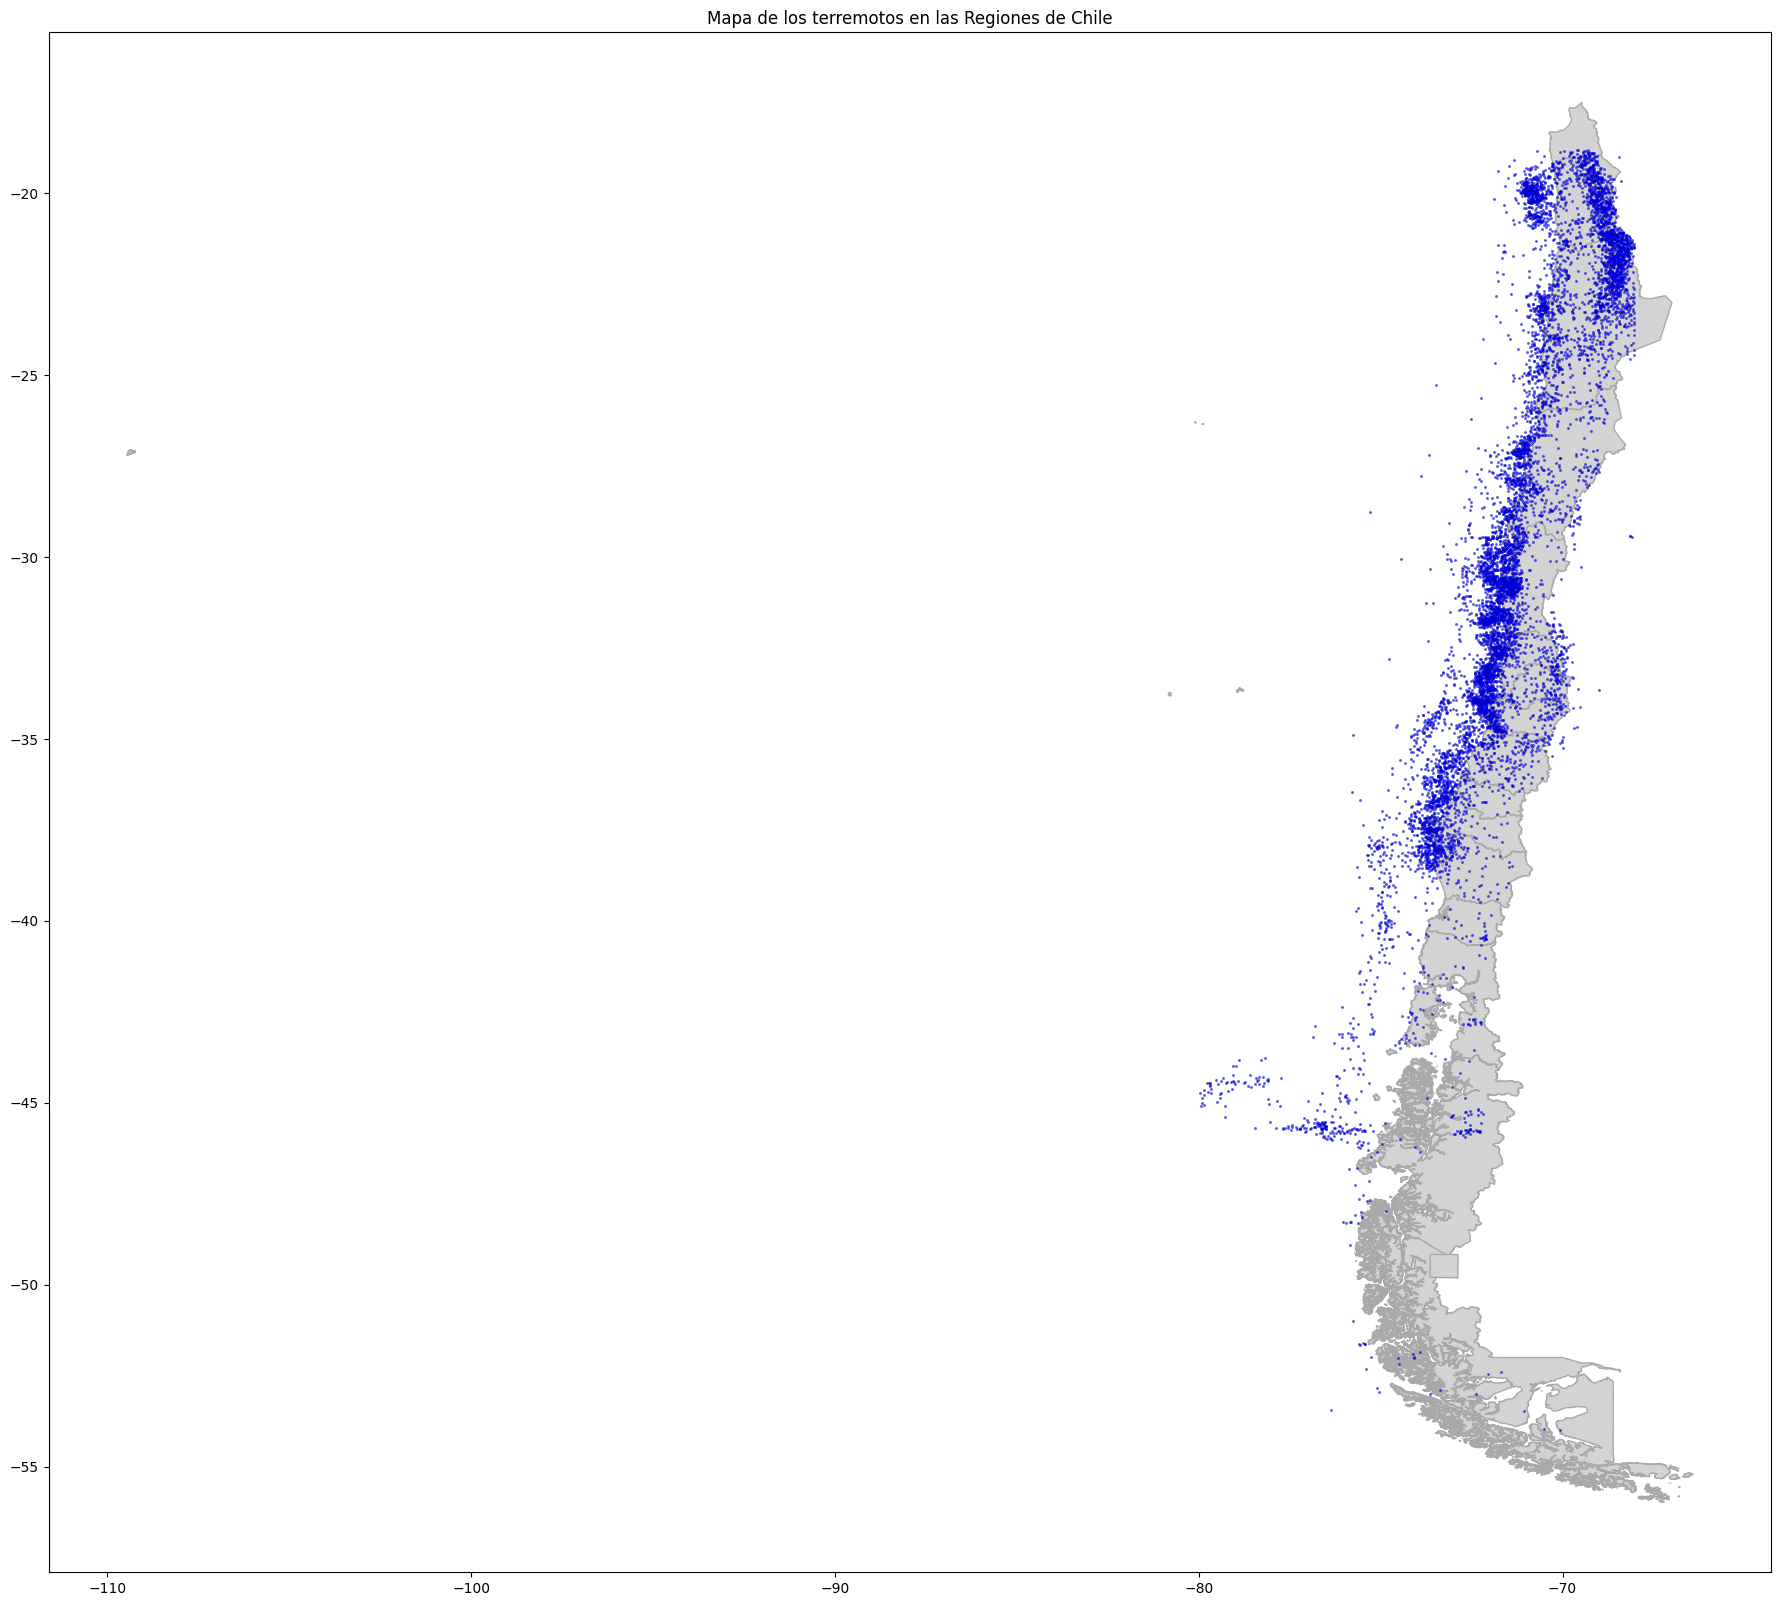

In [53]:
fig, ax = plt.subplots(figsize=(30, 20))
regional_wgs84.plot(ax=ax, color='lightgray', edgecolor="darkgray")
gdf.plot(ax=ax, color='blue', markersize=3, alpha=0.7, edgecolor='darkblue', lw=0.2)
ax.set_aspect('equal')
ax.set_title('Mapa de los terremotos en las Regiones de Chile')
plt.show()